In [1]:
# TASK 2
#AUTHOR _AMULYA_MAURYA_

import pandas as pd

# --2.1-- Read the CSV file
data = pd.read_csv('C:/Users/MY PC/Downloads/used_bikes.csv')
print(data.head(10))

#--2.2-- checking memory and datatypes before changing
original_memory = data.memory_usage(deep=True).sum()
print(f"Original memory usage: {original_memory} bytes")
print(data.dtypes)

                                  bike_name     price       city  kms_driven  \
0        TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1               Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                      Triumph Daytona 675R  600000.0      Delhi       110.0   
3                      TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4      Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   
5                          Yamaha FZs 150cc   53499.0      Delhi     25000.0   
6             Honda CB Hornet 160R  ABS DLX   85000.0      Delhi      8200.0   
7       Hero Splendor Plus Self Alloy 100cc   45000.0      Delhi     12645.0   
8         Royal Enfield Thunderbird X 350cc  145000.0  Bangalore      9190.0   
9  Royal Enfield Classic Desert Storm 500cc   88000.0      Delhi     19000.0   

          owner  age  power          brand  
0   First Owner  3.0  110.0            TVS  
1   First Owner  4.0  350.0  

In [2]:
# --2.2 continue--  Changing datatypes of columns
float_cols = data.select_dtypes(include=['float64']).columns
data[float_cols] = data[float_cols].astype('Int64')
print(data.dtypes)

bike_name     object
price          Int64
city          object
kms_driven     Int64
owner         object
age            Int64
power          Int64
brand         object
dtype: object


In [3]:
# --Checking the new Memory usage
new_memory = data.memory_usage(deep=True).sum()
print(f"New memory usage: {new_memory} bytes")

New memory usage: 46653 bytes


In [5]:
import mysql.connector
from mysql.connector import Error

try:
    conn = mysql.connector.connect(
        host='127.0.0.1',
        user='root',
        password='1234',
        database='amulya1'
    )
    
    cursor = conn.cursor()

    # Check if the table exists
    cursor.execute("SHOW TABLES LIKE 'bike_records'")
    table_exists = cursor.fetchone()

    # Create table if it doesn't exist
    create_table_query = '''
    CREATE TABLE IF NOT EXISTS bike_records (
        bike_name VARCHAR(255),
        price INT,
        city VARCHAR(255),
        kms_driven INT,
        owner VARCHAR(255),
        age INT,
        power INT,
        brand VARCHAR(255)
    )
    '''
    cursor.execute(create_table_query)

    # Insert data into the MySQL table 'bike_records'
    for _, row in data.iterrows():
        cursor.execute('''
            INSERT INTO bike_records (bike_name, price, city, kms_driven, owner, age, power, brand)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        ''', tuple(row))
    
    # Commit changes
    conn.commit()

    ''' 
    We are dumping the data every day, so first delete the indexing from the table and then insert the data.
    '''

    # Create index on 'age' column if the table is created for the first time
    if not table_exists:
        cursor.execute("CREATE INDEX idx_age ON bike_records(age)")
    else:
        # Dropping the existing index on 'age' column if it exists and recreating the index
        cursor.execute("ALTER TABLE bike_records DROP INDEX IF EXISTS idx_age")
        cursor.execute("CREATE INDEX idx_age ON bike_records(age)")

    # Closing the cursor and connection
    cursor.close()
    conn.close()

except Error as e:
    print("Error while connecting to MySQL", e)


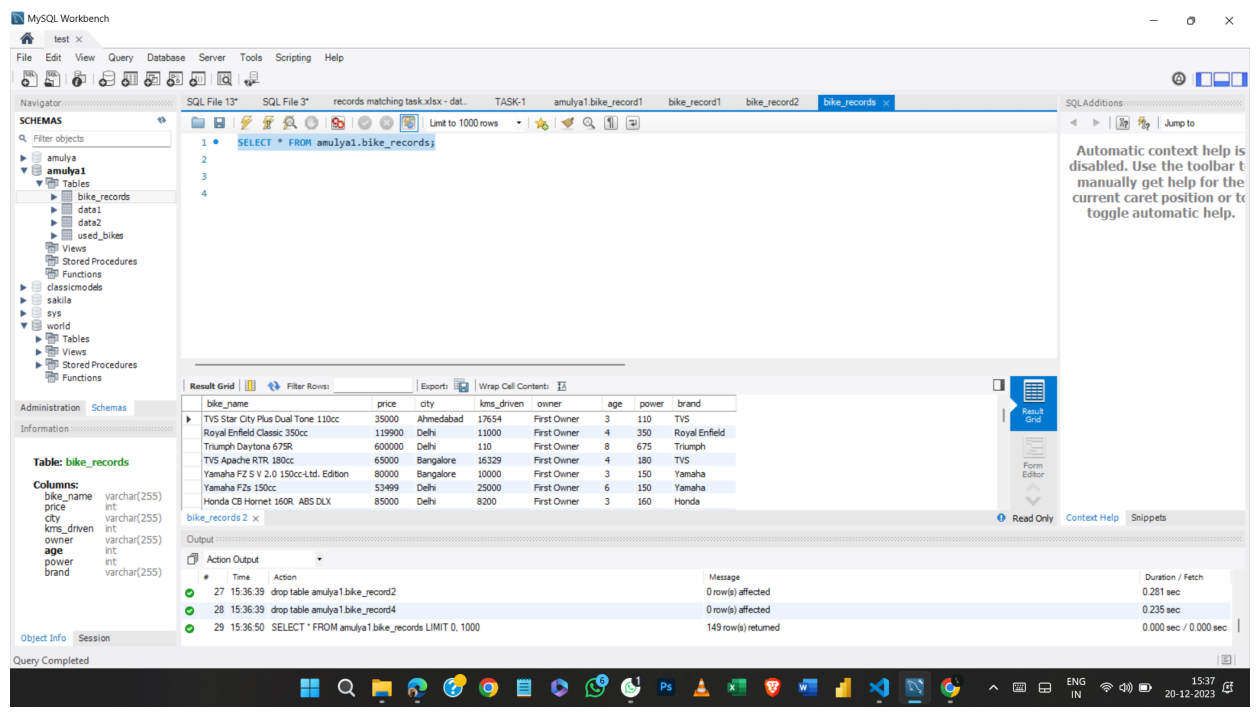

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image file
#image_path = 'C:\Users\MY PC\OneDrive\Pictures\Screenshots\img.png'  # Replace with the actual path to your image

# Read the image using Matplotlib
img = mpimg.imread('C:/Users/MY PC/OneDrive/Pictures/Screenshots/img.png')

# Specify figure size
plt.figure(figsize=(16, 16))

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()



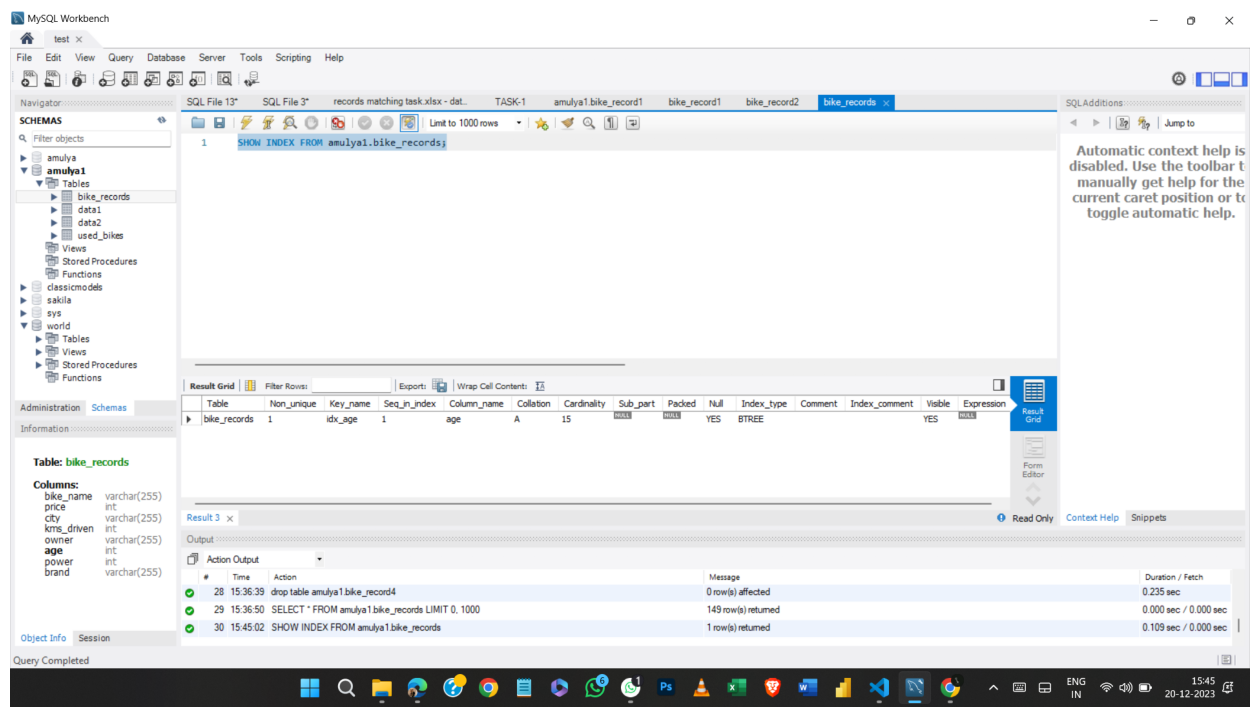

In [12]:
img2=mpimg.imread('C:/Users/MY PC/OneDrive/Pictures/Screenshots/img2.png')
plt.figure(figsize=(16, 16))

plt.imshow(img2)
plt.axis('off')  
plt.show()